# Part 1. Comparing across continents

In this section, we aim to visually display the daily total confirmed cases of COVID-19 from the beginning of the outbreak around 12/31/19 to 04/29/20 in each six continents. Then, we analyzed the data using summmary functions by computing the mean, standard deviation, and rate of increase in each continent. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
covid_continents = pd.read_csv("covid_continents.csv")
covid_continents.head()

,Unnamed: 0,Entity,Code,Date,Total_confirmed_cases
0,545,Asia,NaN,31-Dec-19,27
1,546,Asia,NaN,1-Jan-20,27
2,547,Asia,NaN,2-Jan-20,27
3,548,Asia,NaN,3-Jan-20,44
4,549,Asia,NaN,4-Jan-20,44


In [3]:
# Select wanted columns only
covid_continents = covid_continents[['Entity', 'Date', 'Total_confirmed_cases']]

# Rename the column "Entity" to "Continent"
covid_continents = covid_continents.rename(columns = {'Entity': 'Continent'})

# Set the column "Continent" as the index
covid_continents.set_index('Continent', inplace=True, drop=True)

# Compute the log of total confirmed cases and add the log column to df
covid_continents["Log_total_confirmed_cases"] = np.log(covid_continents.Total_confirmed_cases)

# Convert date to number of days after 12/31/19 and add that column to df
# Acknowledge Prof.Mimno's code
covid_continents["Date"] = pd.to_datetime(covid_continents["Date"])
start_date = pd.Timestamp("2019-12-31")
covid_continents["Daysafter"] = (covid_continents["Date"] - start_date).dt.days

covid_continents.head()

,Date,Total_confirmed_cases,Log_total_confirmed_cases,Daysafter
Continent,,,,
Asia,2019-12-31,27,3.295837,0
Asia,2020-01-01,27,3.295837,1
Asia,2020-01-02,27,3.295837,2
Asia,2020-01-03,44,3.784190,3
Asia,2020-01-04,44,3.784190,4


## Total confirmed cases in 6 continents

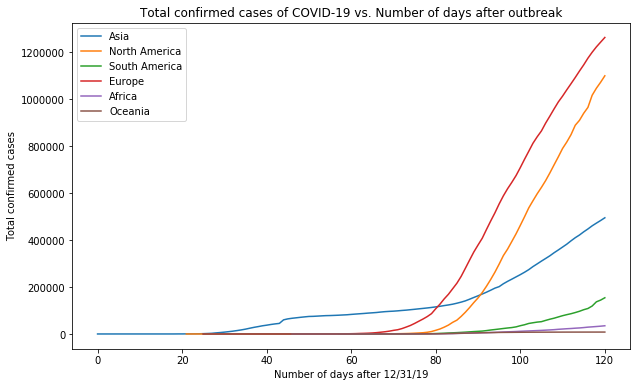

In [4]:
plt.figure(figsize=(10,6))

plt.plot(covid_continents.loc["Asia"].Daysafter, covid_continents.loc["Asia"].Total_confirmed_cases, label="Asia")
plt.plot(covid_continents.loc["North America"].Daysafter, covid_continents.loc["North America"].Total_confirmed_cases, label="North America")
plt.plot(covid_continents.loc["South America"].Daysafter, covid_continents.loc["South America"].Total_confirmed_cases, label="South America")
plt.plot(covid_continents.loc["Europe"].Daysafter, covid_continents.loc["Europe"].Total_confirmed_cases, label="Europe")
plt.plot(covid_continents.loc["Africa"].Daysafter, covid_continents.loc["Africa"].Total_confirmed_cases, label="Africa")
plt.plot(covid_continents.loc["Oceania"].Daysafter, covid_continents.loc["Oceania"].Total_confirmed_cases, label="Oceania")

plt.legend(loc="upper left")
plt.title("Total confirmed cases of COVID-19 vs. Number of days after outbreak")
plt.xlabel("Number of days after 12/31/19")
plt.ylabel("Total confirmed cases")
plt.show()

## Log of total confirmed cases in 6 continents - comparing the rate of increase

Computing log transforms an exponential growth to a linear growth

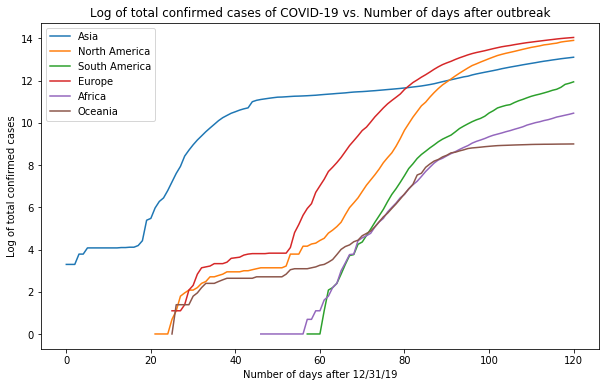

In [5]:
plt.figure(figsize=(10,6))

plt.plot(covid_continents.loc["Asia"].Daysafter, covid_continents.loc["Asia"].Log_total_confirmed_cases, label="Asia")
plt.plot(covid_continents.loc["North America"].Daysafter, covid_continents.loc["North America"].Log_total_confirmed_cases, label="North America")
plt.plot(covid_continents.loc["South America"].Daysafter, covid_continents.loc["South America"].Log_total_confirmed_cases, label="South America")
plt.plot(covid_continents.loc["Europe"].Daysafter, covid_continents.loc["Europe"].Log_total_confirmed_cases, label="Europe")
plt.plot(covid_continents.loc["Africa"].Daysafter, covid_continents.loc["Africa"].Log_total_confirmed_cases, label="Africa")
plt.plot(covid_continents.loc["Oceania"].Daysafter, covid_continents.loc["Oceania"].Log_total_confirmed_cases, label="Oceania")

plt.legend(loc="upper left")
plt.title("Log of total confirmed cases of COVID-19 vs. Number of days after outbreak")
plt.xlabel("Number of days after 12/31/19")
plt.ylabel("Log of total confirmed cases")
plt.show()

In [6]:
# Create a function that returns the number of initial cases and the growth rate up to a certain day

def summary(continent, day):
    print(continent)
    covid = covid_continents.loc[continent]
    
    # nested function that calculates the slope, coeficcient, and r^2 value
    # Acknowledge Prof.Mimno's code
    def lm(df, inputs, output):
        model = LinearRegression().fit(df[inputs], df[output])
        coef_strings = ["{:.2f}".format(coefficient) for coefficient in model.coef_]
        r2_score = model.score(df[inputs], df[output])
        print("coefficients: {} intercept: {:.2f};   r^2: {:.2f}"
              .format(", ".join(coef_strings), model.intercept_, r2_score))
        return model.intercept_, coef_strings[0]
       
    print("\nBefore Day {}".format(day))
    model_before = lm(covid[ covid["Daysafter"] < day], ["Daysafter"],"Log_total_confirmed_cases" )
    print("initial cases: {:.1f}, growth rate: {:.0f}%".format(np.exp(model_before[0]), 100 * (np.exp(float(model_before[1])) - 1)))
    
    print("\nAfter Day {}".format(day))
    model_after = lm(covid[ covid["Daysafter"] > day], ["Daysafter"],"Log_total_confirmed_cases" )
    print("initial cases: {:.1f}, growth rate: {:.0f}%".format(np.exp(model_after[0]), 100 * (np.exp(float(model_after[1])) - 1)))

## Using trial and error to find out the number of days each continent took to flatten out the curve

In [7]:
summary("Asia", 50)

Asia

Before Day 50
coefficients: 0.20 intercept: 2.35;   r^2: 0.95
initial cases: 10.5, growth rate: 22%

After Day 50
coefficients: 0.03 intercept: 9.47;   r^2: 0.96
initial cases: 12921.4, growth rate: 3%


In [8]:
summary("Africa", 95)

Africa

Before Day 95
coefficients: 0.22 intercept: -11.39;   r^2: 0.98
initial cases: 0.0, growth rate: 25%

After Day 95
coefficients: 0.06 intercept: 3.47;   r^2: 1.00
initial cases: 32.2, growth rate: 6%


In [9]:
summary("Europe", 93)

Europe

Before Day 93
coefficients: 0.19 intercept: -4.20;   r^2: 0.96
initial cases: 0.0, growth rate: 21%

After Day 93
coefficients: 0.03 intercept: 10.13;   r^2: 0.97
initial cases: 24990.1, growth rate: 3%


In [10]:
summary("North America", 108)

North America

Before Day 108
coefficients: 0.17 intercept: -4.11;   r^2: 0.96
initial cases: 0.0, growth rate: 19%

After Day 108
coefficients: 0.03 intercept: 9.81;   r^2: 1.00
initial cases: 18223.6, growth rate: 3%


In [11]:
summary("South America", 83)

South America

Before Day 83
coefficients: 0.34 intercept: -19.22;   r^2: 0.99
initial cases: 0.0, growth rate: 40%

After Day 83
coefficients: 0.09 intercept: 1.12;   r^2: 0.98
initial cases: 3.1, growth rate: 9%


In [12]:
summary("Oceania", 105)

Oceania

Before Day 105
coefficients: 0.11 intercept: -2.24;   r^2: 0.93
initial cases: 0.1, growth rate: 12%

After Day 105
coefficients: 0.00 intercept: 8.61;   r^2: 0.94
initial cases: 5469.6, growth rate: 0%


# Part 2. Comparing across countries

We found out that the three countinents with the highest total confirmed cases are Europe, North America, and Asia. Next, we want to analyze specific countries within each continent and determine what factors have the most influence on the spread of COVID-19. To do so, we will pick the top 10 countries with the highest total confirmed cases in each continent. Together, we will be comparing across 30 countries. 

In [13]:
countries_0429 = pd.read_csv("countries_0429.csv", keep_default_na=False)
countries_0429.head()

,Unnamed: 0,Entity,Code,Date,Total_confirmed_cases,Continent
0,54,Afghanistan,AFG,29-Apr-20,1827,AS
1,181,Albania,ALB,29-Apr-20,750,EU
2,240,Algeria,DZA,29-Apr-20,3649,AF
3,287,Andorra,AND,29-Apr-20,748,EU
4,326,Angola,AGO,29-Apr-20,27,AF


In [14]:
# Select wanted columns only
countries_0429 = countries_0429[['Entity', 'Date', 'Continent','Total_confirmed_cases']]

# Rename the column "Entity" to "Continent"
countries_0429 = countries_0429.rename(columns = {'Entity': 'Country'})

# Set the column "Continent" as the index
countries_0429.set_index('Country', inplace=True, drop=True)

# Compute the log of total confirmed cases and add the log column to df
countries_0429["Log_total_confirmed_cases"] = np.log(countries_0429.Total_confirmed_cases)

countries_0429.head()

,Date,Continent,Total_confirmed_cases,Log_total_confirmed_cases
Country,,,,
Afghanistan,29-Apr-20,AS,1827,7.510431
Albania,29-Apr-20,EU,750,6.620073
Algeria,29-Apr-20,AF,3649,8.202208
Andorra,29-Apr-20,EU,748,6.617403
Angola,29-Apr-20,AF,27,3.295837


In [15]:
# Create three dataframes of all the countries in Europe, North America, and Asia
europe = pd.DataFrame()
north_america = pd.DataFrame()
asia = pd.DataFrame()

for i in range(len(countries_0429)):
    if countries_0429.iloc[i].Continent == 'EU':
        europe = europe.append(countries_0429.iloc[i])
    if countries_0429.iloc[i].Continent == 'NA':
        north_america = north_america.append(countries_0429.iloc[i])
    if countries_0429.iloc[i].Continent == 'AS':
        asia = asia.append(countries_0429.iloc[i])

In [16]:
# Compute the mean and standard deviation of the total confirmed cases in North America
print("Europe")
print("mean of total confirmed cases: {:.0f}".format(np.mean(europe.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(europe.Total_confirmed_cases)))

# Print the top 10 countries in North America with the highest total confirmed cases
europe.nlargest(10, ['Total_confirmed_cases'])

Europe
mean of total confirmed cases: 22323
standard deviation of total confirmed cases: 46101.39


,Continent,Date,Log_total_confirmed_cases,Total_confirmed_cases
Italy,EU,29-Apr-20,12.213569,201505.0
United Kingdom,EU,29-Apr-20,11.990060,161145.0
Germany,EU,29-Apr-20,11.968076,157641.0
France,EU,29-Apr-20,11.750642,126835.0
Russia,EU,29-Apr-20,11.446337,93558.0
Belgium,EU,29-Apr-20,10.764984,47334.0
Netherlands,EU,29-Apr-20,10.556229,38416.0
Switzerland,EU,29-Apr-20,10.281273,29181.0
Portugal,EU,29-Apr-20,10.099137,24322.0
Ireland,EU,29-Apr-20,9.897319,19877.0


In [17]:
# Compute the mean and standard deviation of the total confirmed cases in North America
print("North America")
print("mean of total confirmed cases: {:.0f}".format(np.mean(north_america.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(north_america.Total_confirmed_cases)))

# Print the top 10 countries in North America with the highest total confirmed cases
north_america.nlargest(10, ['Total_confirmed_cases'])

North America
mean of total confirmed cases: 32306
standard deviation of total confirmed cases: 170871.99


,Continent,Date,Log_total_confirmed_cases,Total_confirmed_cases
United States,NA,29-Apr-20,13.828015,1012583.0
Canada,NA,29-Apr-20,10.820078,50015.0
Mexico,NA,29-Apr-20,9.726273,16752.0
Dominican Republic,NA,29-Apr-20,8.766550,6416.0
Panama,NA,29-Apr-20,8.732305,6200.0
Cuba,NA,29-Apr-20,7.270313,1437.0
Puerto Rico,NA,29-Apr-20,7.244228,1400.0
Honduras,NA,29-Apr-20,6.603944,738.0
Costa Rica,NA,29-Apr-20,6.558198,705.0
Guatemala,NA,29-Apr-20,6.322565,557.0


In [18]:
# Compute the mean and standard deviation of the total confirmed cases in Asia
print("Asia")
print("mean of total confirmed cases: {:.0f}".format(np.mean(asia.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(asia.Total_confirmed_cases)))

# Print the top 10 countries in Asia with the highest total confirmed cases
asia.nlargest(10, ['Total_confirmed_cases'])

Asia
mean of total confirmed cases: 11005
standard deviation of total confirmed cases: 24155.86


,Continent,Date,Log_total_confirmed_cases,Total_confirmed_cases
Turkey,AS,29-Apr-20,11.649665,114653.0
Iran,AS,29-Apr-20,11.435872,92584.0
China,AS,29-Apr-20,11.337858,83940.0
India,AS,29-Apr-20,10.352395,31332.0
Saudi Arabia,AS,29-Apr-20,9.907330,20077.0
Israel,AS,29-Apr-20,9.654321,15589.0
Singapore,AS,29-Apr-20,9.612533,14951.0
Pakistan,AS,29-Apr-20,9.608109,14885.0
Japan,AS,29-Apr-20,9.536185,13852.0
Qatar,AS,29-Apr-20,9.386057,11921.0


## Compile the total confirmed cases, mean, and standard deviation into a grouped bar chart

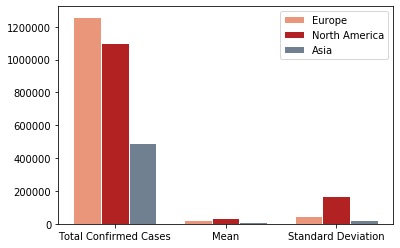

In [21]:
EU = [covid_continents.loc["Europe"].Total_confirmed_cases.max(), np.mean(europe.Total_confirmed_cases),
          np.std(europe.Total_confirmed_cases)]
NA = [covid_continents.loc["North America"].Total_confirmed_cases.max(), np.mean(north_america.Total_confirmed_cases), 
        np.std(north_america.Total_confirmed_cases)]
AS = [covid_continents.loc["Asia"].Total_confirmed_cases.max(), np.mean(asia.Total_confirmed_cases),
      np.std(asia.Total_confirmed_cases)]

barWidth = 0.25
r1 = np.arange(len(EU))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, EU, color='darksalmon', width=barWidth, edgecolor='white', label='Europe')
plt.bar(r2, NA, color='firebrick', width=barWidth, edgecolor='white', label='North America')
plt.bar(r3, AS, color='slategrey', width=barWidth, edgecolor='white', label='Asia')
 
plt.xticks([r + barWidth for r in range(len(EU))], ['Total Confirmed Cases', 'Mean', 'Standard Deviation'])
plt.legend()
plt.show()
